# Лабораторная работа №1,  Компьютерная геометрия и геометрическое моделирование
- Ф.И.О: **Яссин Мохамад Аламин**.
- Ноиер студ. билета: **1032205004**.
- Группа: **НКНбд-01-20**.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, RegularPolygon
import numpy as np

## №1

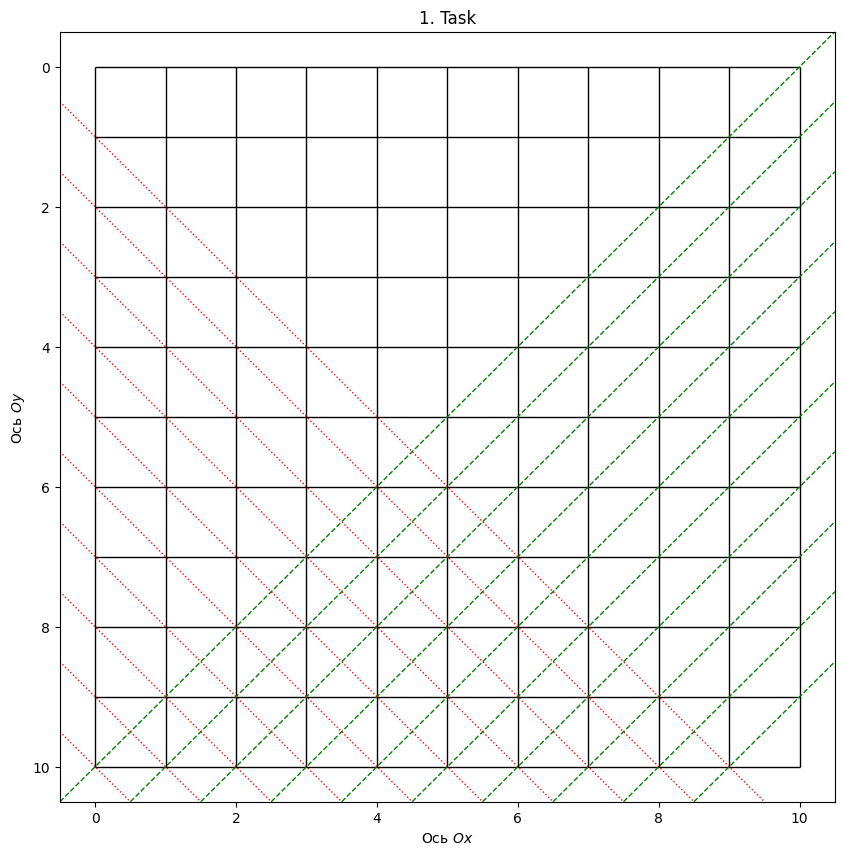

In [2]:
n = 10

fig, ax = plt.subplots(figsize=(n, n))
ax.grid(False)

for i in range(n + 1):
    ax.vlines(x=i, ymin=0, ymax=n, color='black', linestyle='-', linewidth=1)
    ax.hlines(y=i, xmin=0, xmax=n, color='black', linestyle='-', linewidth=1)

for i in range(n):
    ax.axline((i, n), slope=1, color='red', linestyle=':', linewidth=1)  # Главная диагональ
    ax.axline((i, n), slope=-1, color='green', linestyle='--', linewidth=1)  # Побочная диагональ
ax.set_title('1. Task')
ax.set_xlabel(r'Ось $Ox$')
ax.set_ylabel(r'Ось $Oy$')
plt.gca().invert_yaxis()  # Инвертируйте ось y для согласования с координатной плоскостью
plt.show()

## № 2

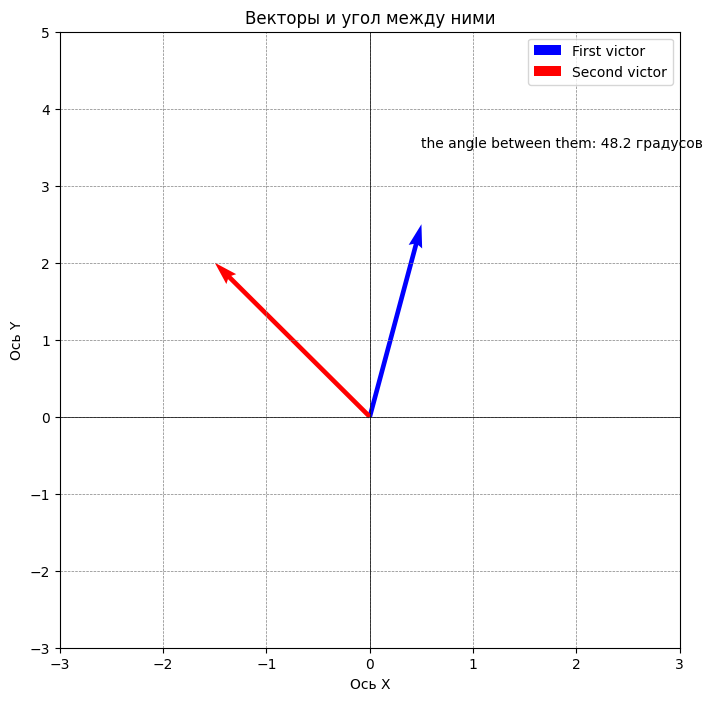

In [3]:
# Создайте векторы
vector1 = np.array([1, 5])
vector2 = np.array([-3, 4])

# Нарисуйте векторы
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=2, color='blue', label='First victor')
plt.quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=2, color='red', label='Second victor')

# Вычислите ориентированный угол между векторами
angle_radians = np.arctan2(np.linalg.det([vector1, vector2]), np.dot(vector1, vector2))
angle_deg = np.degrees(angle_radians)

# Выведите значение угла на графике
plt.text(0.5, 3.5, f'the angle between them: {angle_deg:.1f} градусов', fontsize=10)

# Отображение графика
plt.xlim(-3, 3)
plt.ylim(-3, 5)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title('Векторы и угол между ними')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.show()



Мы можем видеть, как линейное преобразование изменило ориентированный угол между векторами.

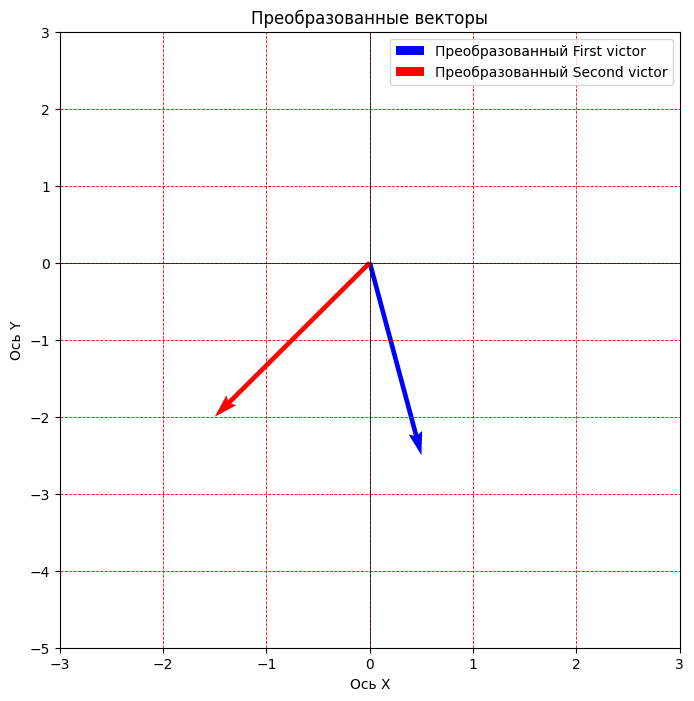

In [4]:
# Определите матрицу преобразования
transformation_matrix = np.array([[1, 0], [0, -1]])

# Примените линейное преобразование к векторам
transformed_vector1 = np.dot(transformation_matrix, vector1)
transformed_vector2 = np.dot(transformation_matrix, vector2)

# Нарисуйте преобразованные векторы
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, transformed_vector1[0], transformed_vector1[1], angles='xy', scale_units='xy', scale=2, color='blue', label='Преобразованный First victor')
plt.quiver(0, 0, transformed_vector2[0], transformed_vector2[1], angles='xy', scale_units='xy', scale=2, color='red', label='Преобразованный Second victor')

# Отображение графика
plt.xlim(-3, 3)
plt.ylim(-5, 3)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'red', linestyle = '--', linewidth = 0.6)
plt.legend()
plt.title('Преобразованные векторы')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.show()



полярной системе координат

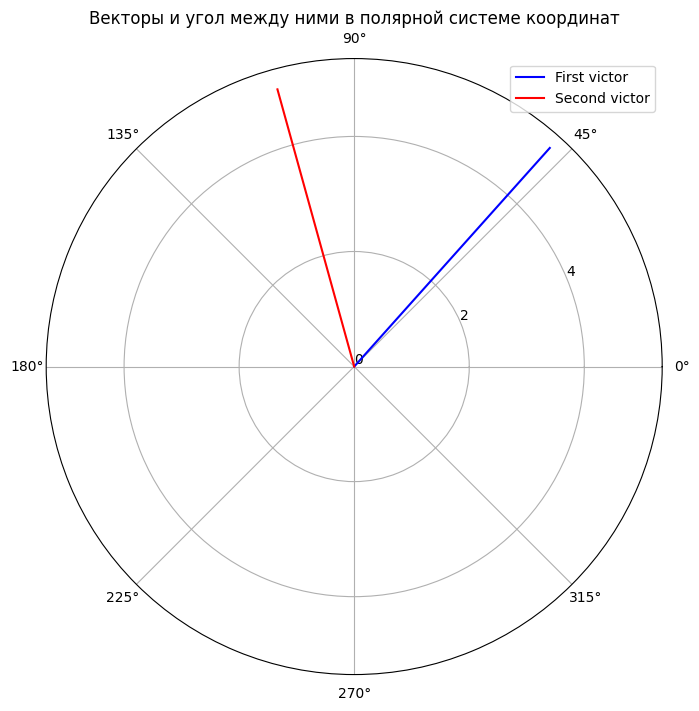

In [5]:
# Переход в полярную систему координат
plt.figure(figsize=(8, 8))
plt.polar([0, angle_radians], [0, np.linalg.norm(vector1)], label='First victor', color='blue')
plt.polar([0, angle_radians+1], [0, np.linalg.norm(vector2)], label='Second victor', color='red')

# Установите радиальные метки
plt.yticks(np.arange(0, np.ceil(np.linalg.norm(vector1)), step=2))

# Добавьте легенду
plt.legend()

# Отображение графика
plt.title('Векторы и угол между ними в полярной системе координат')
plt.show()


## №3

Написать программу, которая рисует произвольный многоугольник по заданным координатам всех его вершин

Oriented area of the polygon: 4.0


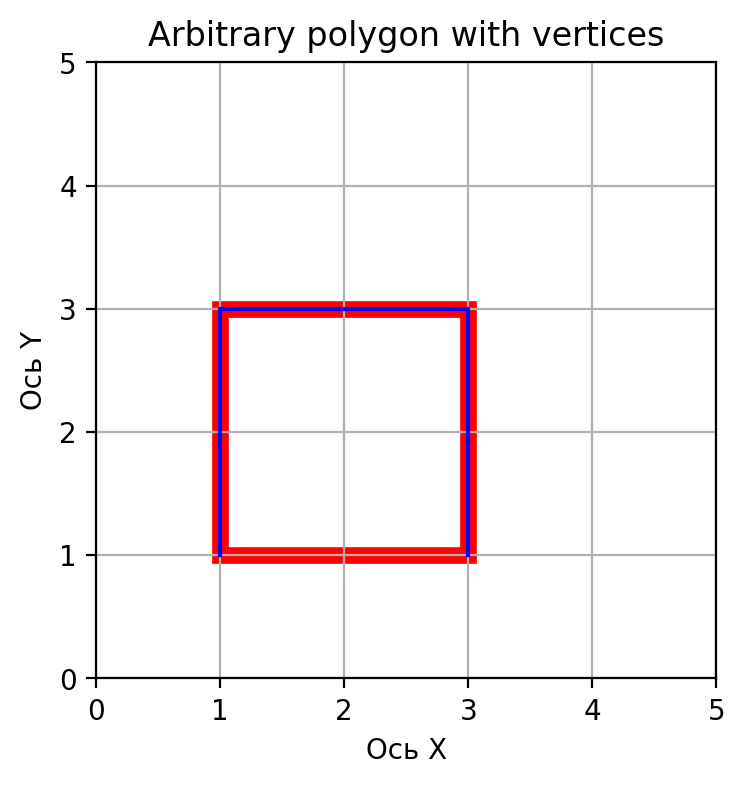

In [6]:


# Set the DPI to 200
plt.rcParams['figure.dpi'] = 200

# Define the coordinates of the polygon's vertices (any number of vertices)
vertices = np.array([(1, 1), (1, 3), (3, 3), (3, 1)])

# Drawing the polygon
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust the figure size as needed
polygon = Polygon(vertices, closed=True, fill=False, edgecolor='r', linewidth=6)
ax.add_patch(polygon)

# Display the vertices of the polygon as marker points
x_coords = vertices[:, 0]
y_coords = vertices[:, 1]
ax.plot(x_coords, y_coords, 'b', markersize=8)  # blue round markers

# Calculate the oriented area of the polygon
def oriented_area(vertices):
    n = len(vertices)
    area = 0
    for i in range(n):
        x1, y1 = vertices[i]
        x2, y2 = vertices[(i + 1) % n]
        area += (x1 * y2 - x2 * y1)
    return 0.5 * abs(area)

area = oriented_area(vertices)
print(f"Oriented area of the polygon: {area}")

# Accessing the coordinates of vertices and the coordinates of the i-th vertex
x_of_vertices = vertices[:, 0]
y_of_vertices = vertices[:, 1]

i = 2  # Example of accessing the coordinates of the i-th vertex
x_i = x_of_vertices[i]
y_i = y_of_vertices[i]

# Display the plot
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid(True)
plt.title('Arbitrary polygon with vertices')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.show()

## №4

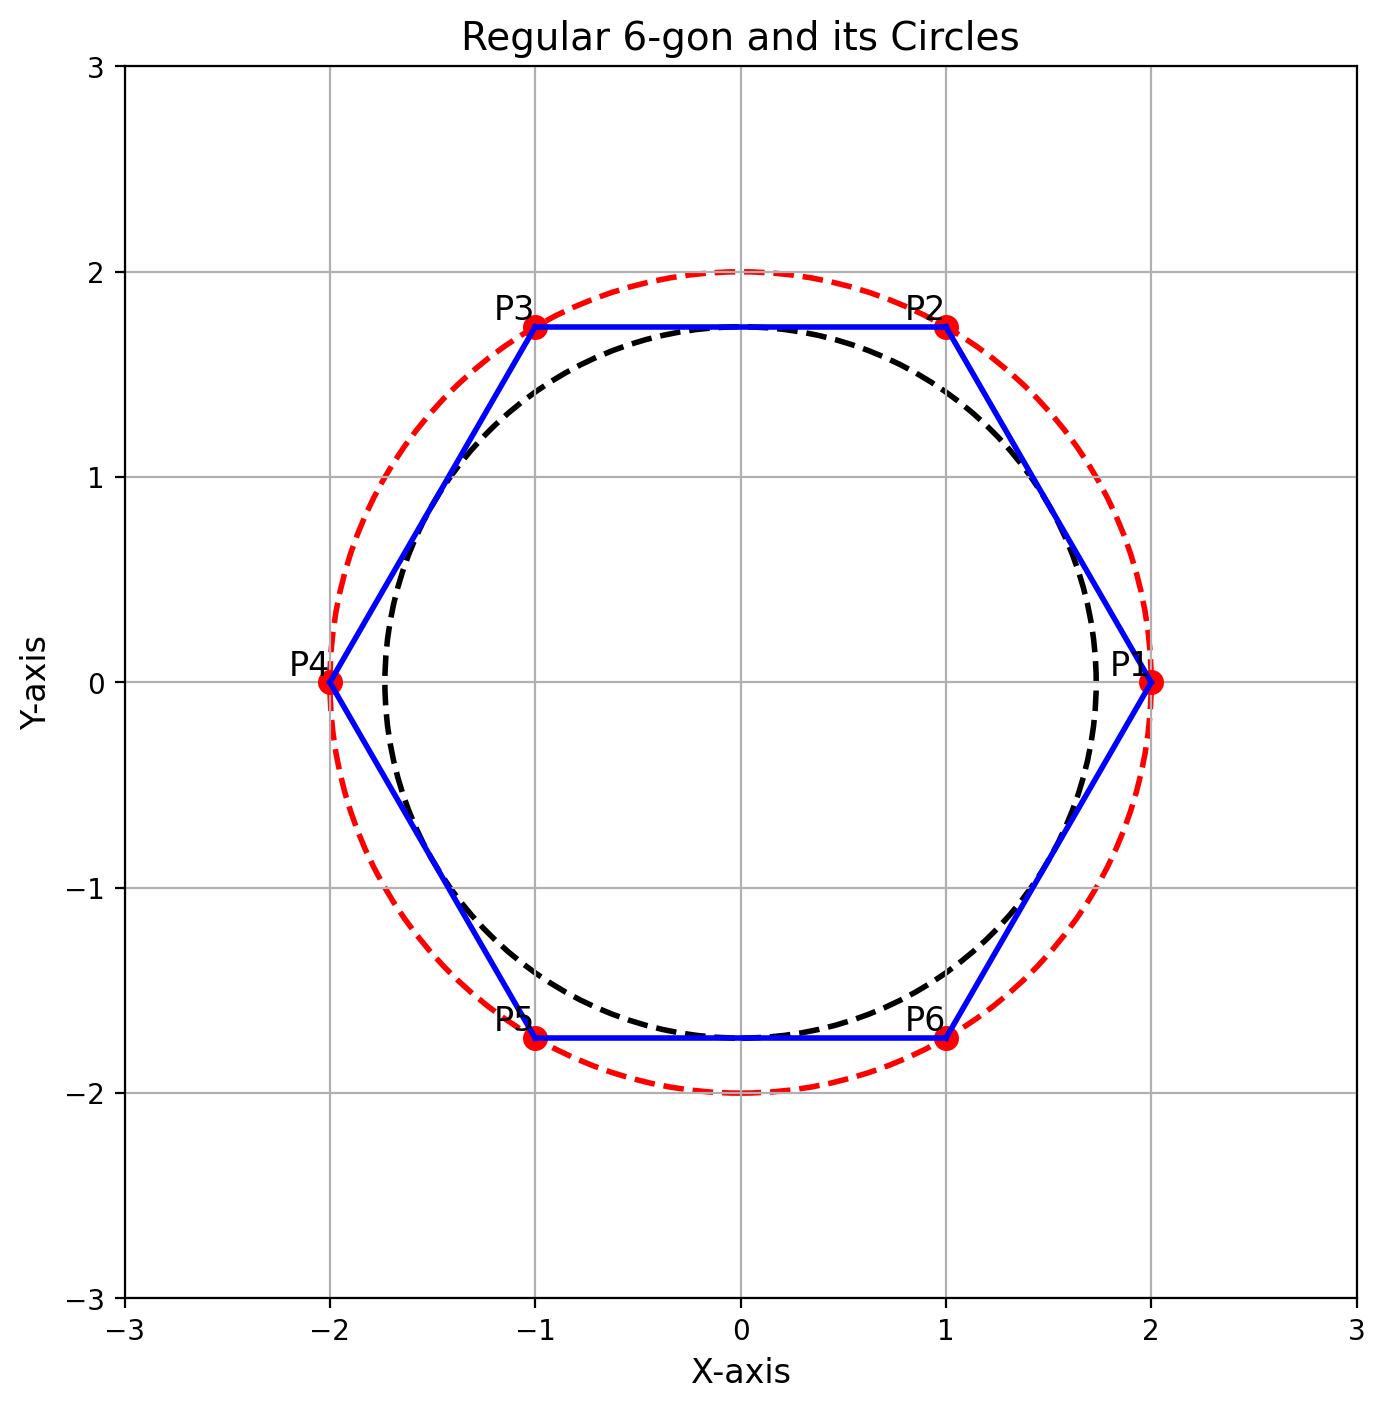

In [7]:
# Define the number of sides (n) and the radii of the inscribed (r) and circumscribed (R) circles
n = 6  # Number of sides
R = 2.0  # Radius of the circumscribed circle
r = R * np.cos(np.pi / n)  # Radius of the inscribed circle

# Calculate the coordinates of the vertices of the regular polygon
theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
x_coords = R * np.cos(theta)
y_coords = R * np.sin(theta)

# Create a figure with DPI 200
fig, ax = plt.subplots(figsize=(8, 8), dpi=200)

# Draw the circumscribed circle
circle_outside = plt.Circle((0, 0), R, color='red', fill=False, linestyle='dashed', linewidth=2)
ax.add_patch(circle_outside)

# Draw the inscribed circle
circle_inside = plt.Circle((0, 0), r, color='black', fill=False, linestyle='dashed', linewidth=2)
ax.add_patch(circle_inside)

# Draw the vertices of the polygon
ax.plot(x_coords, y_coords, 'ro', markersize=8)

# Label the vertices of the polygon
for i, (x, y) in enumerate(zip(x_coords, y_coords), start=1):
    ax.text(x, y, f'P{i}', fontsize=12, ha='right', va='bottom')

# Draw the sides of the polygon
for i in range(n):
    ax.plot([x_coords[i], x_coords[(i + 1) % n]], [y_coords[i], y_coords[(i + 1) % n]], color='blue', linewidth=2)

# Set plot limits and aspect ratio
ax.set_xlim(-R - 1, R + 1)
ax.set_ylim(-R - 1, R + 1)
ax.set_aspect('equal', adjustable='box')  # Scaling without distortion
ax.grid(True)

# Display the plot
ax.set_title(f'Regular {n}-gon and its Circles', fontsize=14)
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
plt.show()


Вычислите ориентированную площадь многоугольника. Проверьте корректность вычислений на примере правильного многоугольника, площадь которого можно вычислить теоретически

№ №5

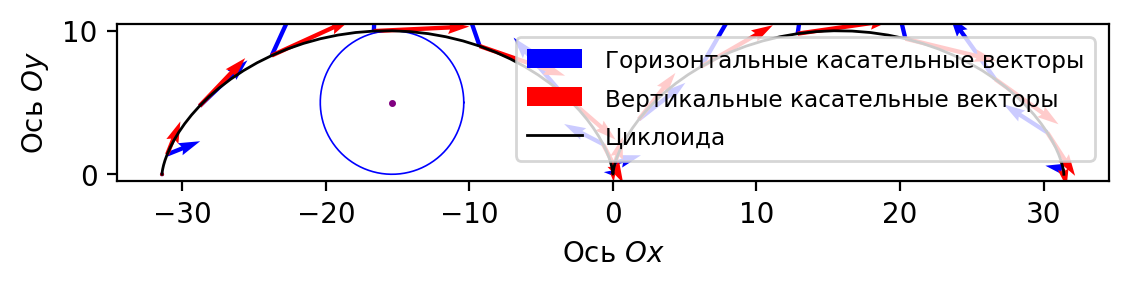

In [8]:
# Ввод начальных данных:
r = 5
t = np.linspace(-2 * np.pi, 2 * np.pi, 100)

# Инициализация функции:
x = r * (t - np.sin(t))
y = r * (1 - np.cos(t))

# Рассчет производных:
dx = r - r * np.cos(t)
dy = r * np.sin(t)

fig = plt.figure(dpi=200)
ax = fig.add_subplot(1, 1, 1)

# Отображение синего круга:
l = np.linspace(0, 2 * np.pi, 100)
X_circle = [(r * np.cos(i) + x[25]) for i in l]
Y_circle = [(r * np.sin(i) + r) for i in l]
ax.plot(X_circle, Y_circle, marker="", color="blue", linewidth=0.6)
ax.plot(x[25], r, marker=".", ms=3, color="purple")

# Отображение поля касательных векторов и циклоиды (с помощью quiver):
ax.quiver(x[::6], y[::6], dy[::6], dx[::6], units='xy', angles='xy', color='blue', width=0.3, scale=1.5, label='Горизонтальные касательные векторы')
ax.quiver(x[::6], y[::6], dx[::6], dy[::6], units='xy', angles='xy', color='red', width=0.3, scale=1.5, label='Вертикальные касательные векторы')
ax.plot(x, y, linewidth=1, color='black', label=r'Циклоида')

ax.set_xlabel(r'Ось $Ox$')
ax.set_ylabel(r'Ось $Oy$')

legend = ax.legend(loc=1)
for text in legend.get_texts():
    text.set_fontsize('small')

ax.set_aspect('equal')

plt.show()


## №6

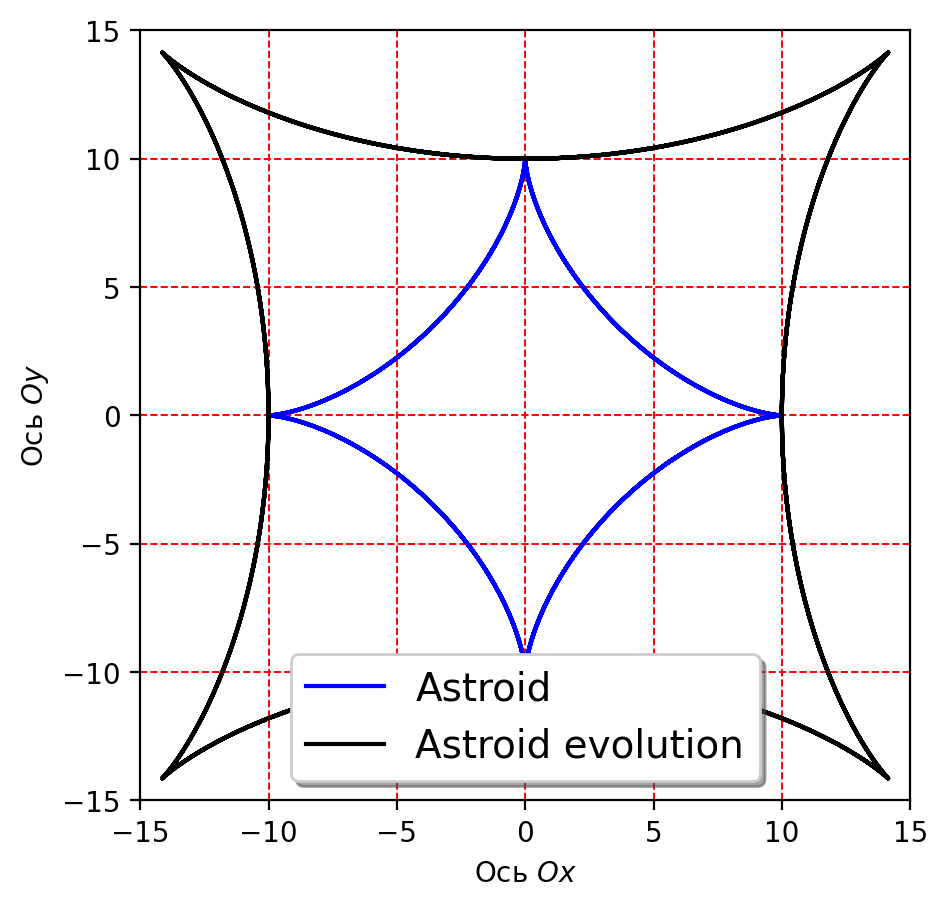

In [9]:
# Entering the initial data:
R = 10
t = np.linspace(-R * 1.5, R * 1.5, 10000)
# initialize the function:
x = R * np.cos(t)**3
y = R * np.sin(t)**3
# производное 1-ого раза
xx = -3 * R * np.sin(t) * np.cos(t)**2
yy = 3 * R * np.cos(t) * np.sin(t)**2
# производное 2-ого раза
xxx = -3 * R * np.cos(t) * (np.power(np.cos(t), 2) - 2 * np.power(np.sin(t), 2))
yyy = 3 * R * np.sin(t) * (2 * np.power(np.cos(t), 2) - np.power(np.sin(t), 2))
# Эвулюцая эстроида:
xe = x - yy * (xx**2 + yy**2) / (xx*yyy - xxx*yy)
ye = y + xx * (xx**2 + yy**2) / (xx*yyy - xxx*yy)
# Edit plt
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.grid(color='red', linestyle='dashed', linewidth=0.7)
ax.set_aspect('equal')
# Setting boundaries
ax.set_xlim(-R * 1.5, R * 1.5)
ax.set_ylim(-R * 1.5, R * 1.5)
# labels
ax.set_xlabel(r'Ось $Ox$')
ax.set_ylabel(r'Ось $Oy$')
# evolution:
ax.plot(x, y, color='blue', label='Astroid')
ax.plot(xe, ye, color='black', label='Astroid evolution')

ax.legend(fontsize=14, shadow=True) # signatures